In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import support vector regressor algorithm
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Import modelling methods
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
# Import the model performance evaluation metrics
from sklearn import metrics
# Import Adaboost, Gradient Boost, Random Forest and Stacking algorithm
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Instead of load_boston, use fetch_california_housing or fetch_openml
# from sklearn.datasets import load_boston   # to import boston housing dataset
from sklearn.datasets import fetch_california_housing  # Importing the California housing dataset instead
# to visualize decision boundaries
import graphviz
import xgboost as xgb
from xgboost import XGBRegressor

# Load the California housing dataset
housing = fetch_california_housing()
# Access the data and target variables
X = housing.data
y = housing.target

# You can now use X and y for your machine learning tasks.

ModuleNotFoundError: No module named 'xgboost'

In [58]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'indian_liver_patient.csv'

In [59]:
# Check for missing values
df.isnull().sum()

NameError: name 'df' is not defined

In [60]:
# Drop missing values
df1 = df.dropna()
df1.isnull().any()

NameError: name 'df' is not defined

NameError: name 'df1' is not defined

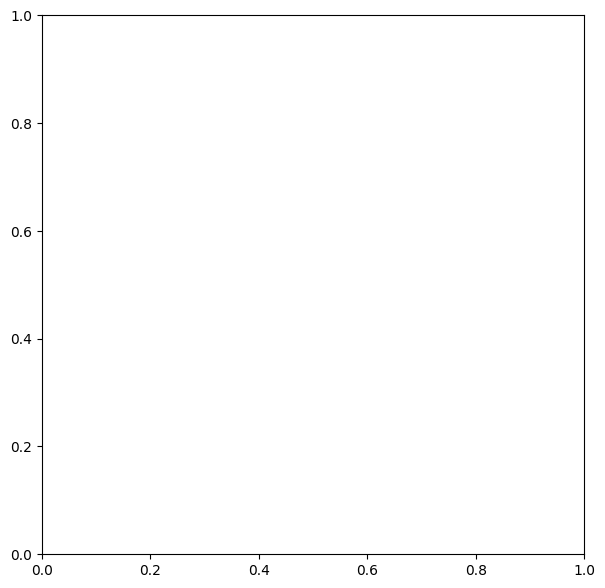

In [61]:
# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(7,7))
# Convert 'Gender' column to numerical representation using pd.get_dummies
# This creates new columns for each category in 'Gender' (e.g., 'Gender_Female', 'Gender_Male') with 1s and 0s
df1_encoded = pd.get_dummies(df1, columns=['Gender'], drop_first=True) # drop_first avoids multicollinearity

# Calculate correlation on the encoded DataFrame
sns.heatmap(abs(df1_encoded.corr()), annot=True, square=True, cbar=False, ax=ax, linewidths=0.25);

In [ ]:
# Drop correlated features
df2 = df1.drop(columns= ['Direct_Bilirubin', 'Alamine_Aminotransferase', 'Total_Protiens'])

In [62]:
df2['Dataset'] = df2['Dataset'].replace(1,0)
df2['Dataset'] = df2['Dataset'].replace(2,1)

NameError: name 'df2' is not defined

In [63]:
print('How many people have disease:', '\n', df2.groupby('Gender')[['Dataset']].sum(), '\n')
print('How many people participated in the study:', '\n', df2.groupby('Gender')[['Dataset']].count())

NameError: name 'df2' is not defined

In [64]:
print('Percentage of people with the disease depending on gender:')
df2.groupby('Gender')[['Dataset']].sum()/ df2.groupby('Gender')[['Dataset']].count()

Percentage of people with the disease depending on gender:


NameError: name 'df2' is not defined

In [65]:
# defining the X and y variables
X = df2[['Gender', 'Total_Bilirubin','Alkaline_Phosphotase','Aspartate_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio']]
y = pd.Series(df2['Dataset'])

NameError: name 'df2' is not defined

In [66]:
labelencoder = LabelEncoder()
X['Gender'] = labelencoder.fit_transform(X['Gender'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [68]:
ADB = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         n_estimators=125,
                         learning_rate = 0.6,
                         random_state=42)

ADB.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [69]:
# calculating model evaluation metrics using cross_val_score like accuracy, R2 score, etc.
n_scores = cross_val_score(ADB, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
('Accuracy: %.3f' % (np.mean(n_scores)*100))

NameError: name 'cv' is not defined

In [70]:
labels = ADB.predict(X_test)
matrix = metrics.confusion_matrix(y_test, labels)
# creating a heat map to visualize confusion matrix
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

AttributeError: 'AdaBoostClassifier' object has no attribute 'n_classes_'

In [71]:
logit_roc_auc = metrics.roc_auc_score(y_test, labels)
fpr, tpr, thresholds = metrics.roc_curve(y_test, ADB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'labels' is not defined

In [72]:
housing = fetch_california_housing()

print(housing.keys())
print("shape of dataset",housing.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
shape of dataset (20640, 8)


In [73]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [74]:
df = pd.DataFrame(housing.data)
df.columns = housing.feature_names

In [75]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [76]:
df['PRICE'] = housing.target

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [78]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [79]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, random_state=12, test_size=0.15)

In [80]:
# with new parameters
gbr1 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', n_estimators=600,
    max_depth=5,
    learning_rate=0.01,
    min_samples_split=4)
# with default parameters
gbr = GradientBoostingRegressor()

In [81]:
# fit with default parameters
gbr.fit(xtrain, ytrain)

ypred = gbr.predict(xtest)

# calculating Mean Squared Error
mse = metrics.mean_squared_error(ytest,ypred)
# mse for default model
print("MSE: %.2f" % mse)

MSE: 0.27


In [ ]:
# fit by passing hyperparameters
gbr1.fit(xtrain, ytrain)

ypred1 = gbr1.predict(xtest)
# calculating Mean Squared Error
mse1 = metrics.mean_squared_error(ytest, ypred1)

# mse for regularized model
print("MSE: %.2f" % mse1)

In [ ]:
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
import xgboost as xgb  # Ensure xgboost is imported


# Remove this line. It's causing the error because it tries to assign an undefined name 'xgboost' to xgb.
# xgb = xgboost

# You can directly use xgb since it's already aliased to xgboost in the first line.
xgb_reg = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xgb_reg.fit(X_train,y_train)

y_pred = xgb_reg.predict(X_test)

In [ ]:
mse2 = metrics.mean_squared_error(y_test, y_pred)
print("MSE: %f" % (mse))

In [ ]:
xgb.plot_importance(xgb_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
xgb = XGBRegressor()
rf = RandomForestRegressor(n_estimators=400, max_depth=5, max_features=6)
ridge = Ridge()
lasso = Lasso()
svr = SVR(kernel='rbf')

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


xgb = XGBRegressor()
rf = RandomForestRegressor(n_estimators=400, max_depth=5, max_features=6)
# Force Ridge to use a different solver
ridge = Ridge(solver='lsqr')  # or 'svd'
lasso = Lasso()
svr = SVR(kernel='rbf')

estimators = [('ridge', ridge), ('svr', svr), ('rf', rf), ('lasso', lasso)]
reg = StackingRegressor(estimators=estimators, final_estimator=xgb)

# Load the California housing dataset
california_housing = fetch_california_housing(as_frame=True)
X, y = california_housing.data, california_housing.target

# Split the data into training and testing sets
X_train, X_test_actual, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
reg.fit(X_train, y_train)

# Now you can use X_test_actual for prediction
pred = reg.predict(X_test_actual)

In [ ]:
score = metrics.r2_score(y_test, pred)
print(score)